In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
import numpy as np
import glob
import os
import math
from os import listdir
import data_visualization as dv
import dill
import scipy 
from scipy.stats import norm
from scipy import stats
from tqdm import tqdm 
import random
import sys
'''
This script plots the optimals from the numerical simulations onto the data
'''

'\nThis script plots the optimals from the numerical simulations onto the data\n'

In [2]:
# Insert to load the model objects (bc this is where the Optimal_Simulation object is stored: "Simulation_Object.py")
sys.path.insert(0, r'C:\Users\Seth Sullivan\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\Modeling Scripts\\') 
plt.style.use('cashaback_dark')

## Initial Thangs

In [3]:
plt.style.use('cashaback_dark')
wheel = dv.ColorWheel()

# Initial thangs
os.chdir('D:\\Subject_Data\\Seth_MatchPennies_Agent_Exp1')
PATH = os.getcwd()
SAVE_PATH = r'C:\Users\Seth Sullivan\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\Group_Figures\Exp1\\'
if not os.path.exists(SAVE_PATH):
    os.makedirs(SAVE_PATH)

# Fields pull and pull list
os.chdir('D:\Subject_Data\Seth_MatchPennies_Agent_Exp1')
PATH = os.getcwd()
figures_pull_list = []
figures_pull_list_control = []
figures_pull_list_task = []
fields_pull = []
with open(PATH+"\\Figures_Pull_List.txt", "r") as pull_file:
    figures_pull_list = pull_file.read().splitlines()
with open(PATH+"\\Figures_Pull_List_Control.txt", "r") as pull_file:
    analysis_pull_list_control = pull_file.read().splitlines()
with open(PATH+"\\Figures_Pull_List_Task.txt", "r") as pull_file:
    analysis_pull_list_task = pull_file.read().splitlines()
with open(PATH+"\\Fields_Pull.txt", "r") as fields_pull:
    fields_pull = fields_pull.read().splitlines()
num_subjects = len(figures_pull_list)
task_name = 'Seth_MatchPennies_Agent_Exp1'
num_subjects

12

In [4]:
tp3_title = "1000 (50)"
tp4_title = "1000 (150)"
tp5_title = '1100 (50)'
tp6_title = "1100 (150)"
tp7_title = "1200 (50)"
tp8_title = '1200 (150)'
trial_block_titles = [tp3_title, tp4_title, tp5_title,tp6_title, tp7_title, tp8_title]
num_blocks = len(trial_block_titles)

## Pickle and Load Functions

Pickle data

In [5]:
load_path = r'D:\Subject_Data\Seth_MatchPennies_Agent_Exp1\Subjects_Analyzed\\'
subject_object_dict = dill.load((open(load_path + 'subject_object_dict.pkl', 'rb')))
group = dill.load((open(load_path + 'group_object.pkl', 'rb')))

Load Functions

In [6]:
from plot_functions import *
from Subject_Object import *
from Simulation_Object import *

Run individual simulations

In [7]:
# subnames = ['Sub1','Sub2','Sub3','Sub4','Sub5','Sub6','Sub7','Sub8','Sub9','Sub10','Sub11','Sub12']
# subject_simulation_dict_sd50 = {}

# for subname in subnames:
#     print(subname)
#     o = subject_object_dict[subname]
#     temp = Optimal_Decision_Time_Simulation(sub_name = subname,reaction_time_mean = o.reaction_time_minus_sd, movement_time_mean = o.reaction_movement_time_mean, decision_to_action_delay = 50,
#                                             timing_uncertainty= o.coincidence_reach_time_sd, reaction_uncertainty = o.reaction_time_sd, movement_uncertainty = o.reaction_movement_time_sd,
#                                             agent_uncertainty = 50)
#     # dill.dump(temp,open(save_path + f'{subname}_sim_sd50.pkl', 'wb'))
#     subject_simulation_dict_sd50.update({subname:temp})

In [8]:
# subnames = ['Sub1','Sub2','Sub3','Sub4','Sub5','Sub6','Sub7','Sub8','Sub9','Sub10','Sub11','Sub12']
# subject_simulation_dict_sd150 = {}

# for subname in subnames:
#     print(subname)
#     o = subject_object_dict[subname]
#     temp = Optimal_Decision_Time_Simulation(sub_name = subname,reaction_time_mean = o.reaction_time_minus_sd, movement_time_mean = o.reaction_movement_time_mean, 
#                                             timing_uncertainty= o.coincidence_reach_time_sd, reaction_uncertainty = o.reaction_time_sd, movement_uncertainty = o.reaction_movement_time_sd,
#                                             agent_uncertainty = 150)
#     # dill.dump(temp,open(save_path + f'{subname}_sim_sd150.pkl', 'wb'),)
#     subject_simulation_dict_sd150.update({subname:temp})

Run group simulations

In [9]:
o = group
# group_sim_50 = Optimal_Decision_Time_Simulation(NUM_TRIALS = 10000,sub_name = 'Group',reaction_time_mean = o.reaction_time_mean - o.reaction_time_sd, movement_time_mean = o.reaction_movement_time_median - o.reaction_movement_time_sd, 
#                                         timing_uncertainty= o.coincidence_reach_time_sd, reaction_uncertainty = o.reaction_time_sd, movement_uncertainty = o.reaction_movement_time_sd,
#                                         agent_uncertainty = 50)
# group_sim_150 = Optimal_Decision_Time_Simulation(NUM_TRIALS = 10000,sub_name = 'Group',reaction_time_mean = o.reaction_time_mean - o.reaction_time_sd, movement_time_mean = o.reaction_movement_time_median - o.reaction_movement_time_sd, 
#                                         timing_uncertainty= o.coincidence_reach_time_sd, reaction_uncertainty = o.reaction_time_sd, movement_uncertainty = o.reaction_movement_time_sd,
#                                         agent_uncertainty = 150)


In [18]:
group_sim_50 = Optimal_Decision_Time_Simulation(NUM_TRIALS = 10000,sub_name = 'Group',reaction_time_mean = o.reaction_time_mean - o.reaction_time_sd, movement_time_mean = o.reaction_movement_time_median - o.reaction_movement_time_sd, 
                                        decision_to_action_delay_mean = 0,timing_uncertainty= 100, reaction_uncertainty = o.reaction_time_sd, movement_uncertainty = o.reaction_movement_time_sd,
                                        agent_uncertainty = 50)
group_sim_150 = Optimal_Decision_Time_Simulation(NUM_TRIALS = 10000,sub_name = 'Group',reaction_time_mean = o.reaction_time_mean - o.reaction_time_sd, movement_time_mean = o.reaction_movement_time_median - o.reaction_movement_time_sd, 
                                        decision_to_action_delay_mean = 0, timing_uncertainty= 100, reaction_uncertainty = o.reaction_time_sd, movement_uncertainty = o.reaction_movement_time_sd,
                                        agent_uncertainty = 150)

array([[<AxesSubplot:xlabel='Time (ms)', ylabel='Frequency'>,
        <AxesSubplot:xlabel='Time (ms)', ylabel='Frequency'>,
        <AxesSubplot:xlabel='Time (ms)', ylabel='Frequency'>],
       [<AxesSubplot:xlabel='Time (ms)', ylabel='Frequency'>,
        <AxesSubplot:xlabel='Time (ms)', ylabel='Frequency'>,
        <AxesSubplot:xlabel='Time (ms)', ylabel='Frequency'>]],
      dtype=object)

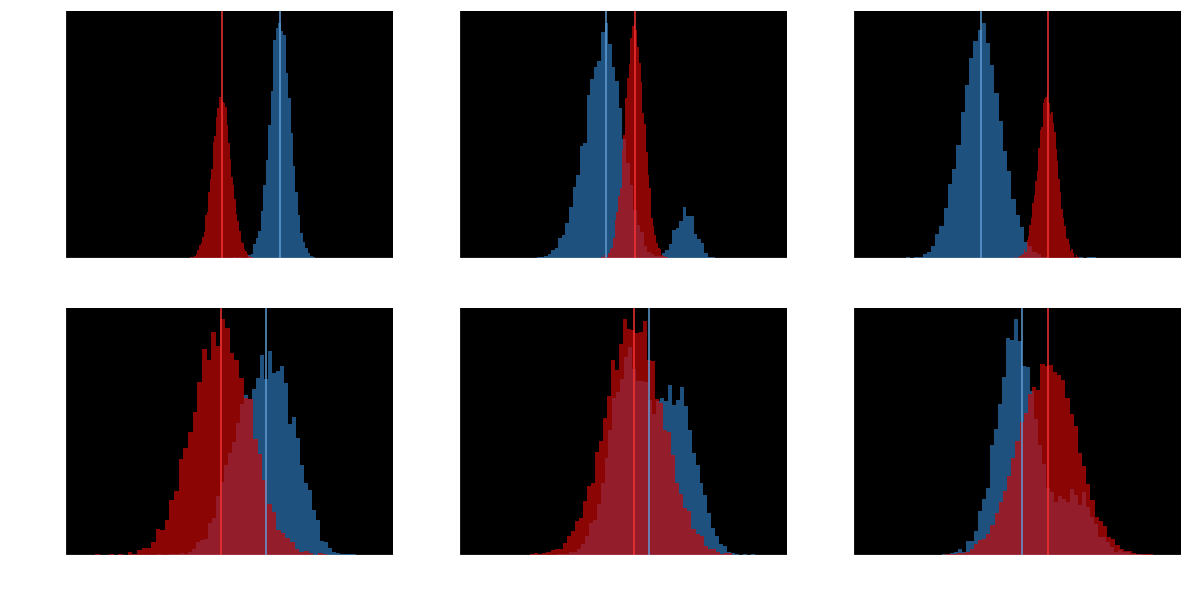

In [19]:
x = Simulation_Experiment_Results([group_sim_50,group_sim_150])
x.plot_histogram(['Player Leave Target Times','Agent Decision Times'])

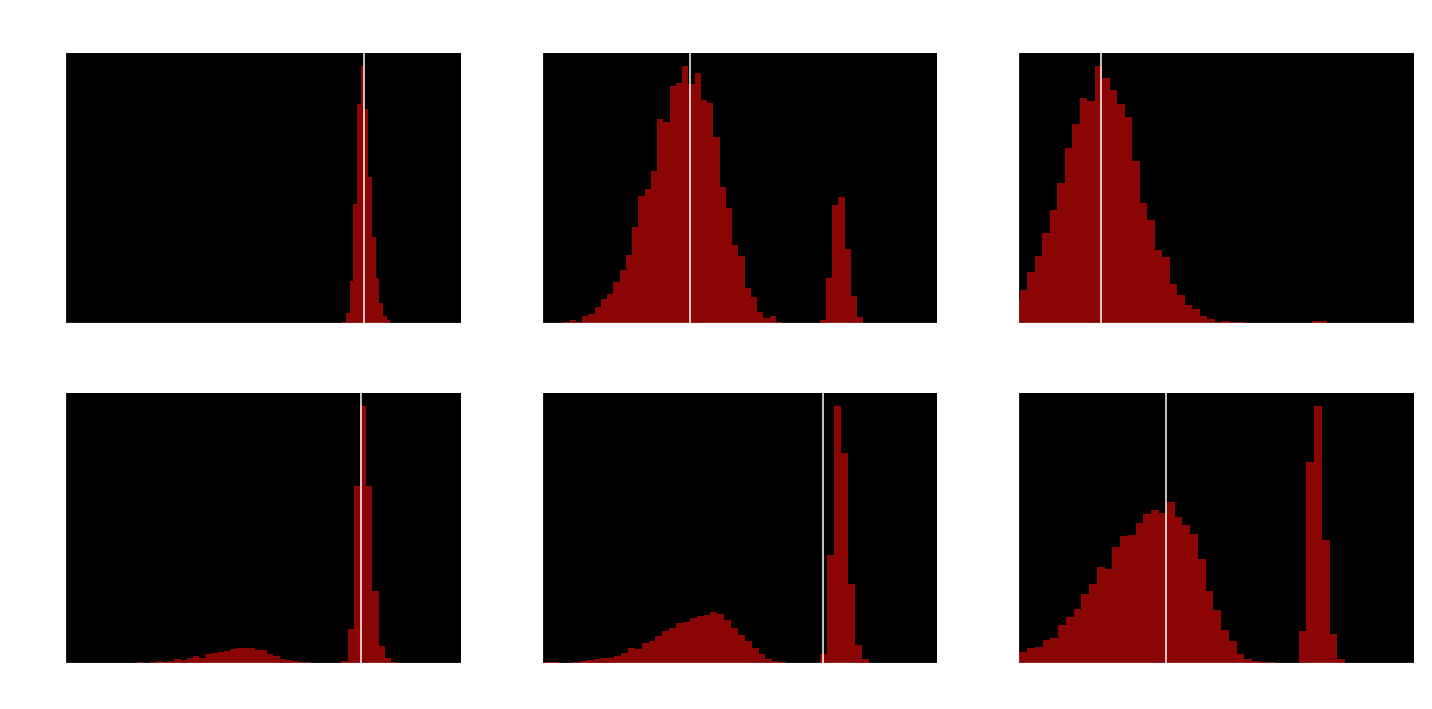

In [20]:
metric = x.optimal_trial_results['Player Leave Time Minus Agent Decision Time']#,'Agent Decision Times'])
fig,axs = plt.subplots(2,3, figsize = (20,10))
c = -1
d = 0
for j in range(num_blocks):
    c+=1
    axs[c,d].hist(metric[j,:], histtype = 'stepfilled', color=wheel.dark_red, alpha = 0.7, bins = 50)
    axs[c,d].axvline(np.nanmedian(metric[j,:]), c='w')
    # axs[c,d].set_xlim(-600,600)
    # axs[c,d].set_ylim(0,200)
    axs[c,d].set_xlabel('Time (ms)')
    axs[c,d].set_ylabel('Frequency')
    labels = ["Player", "Agent"]
    colors = [wheel.dark_blue, wheel.dark_red]
    #dv.Custom_Legend(axs[c,d], labels, colors, fontsize=14, loc = 'upper left')
    axs[c,d].set_title(trial_block_titles[j])
    if c == 1:
        d += 1
        c = -1
plt.setp(axs, xlim=(-600,600))
fig.suptitle(f'Player - Agent Decision Times', c = 'white')
plt.tight_layout()
##plt.savefig(PATH+SAVE_PATH+f'\\Sub{i+1}\\reach_time_distributions', dpi = 400, transparent = True, bbox_inches='tight')
plt.show()


TypeError: scatter() missing 2 required positional arguments: 'x' and 'y'

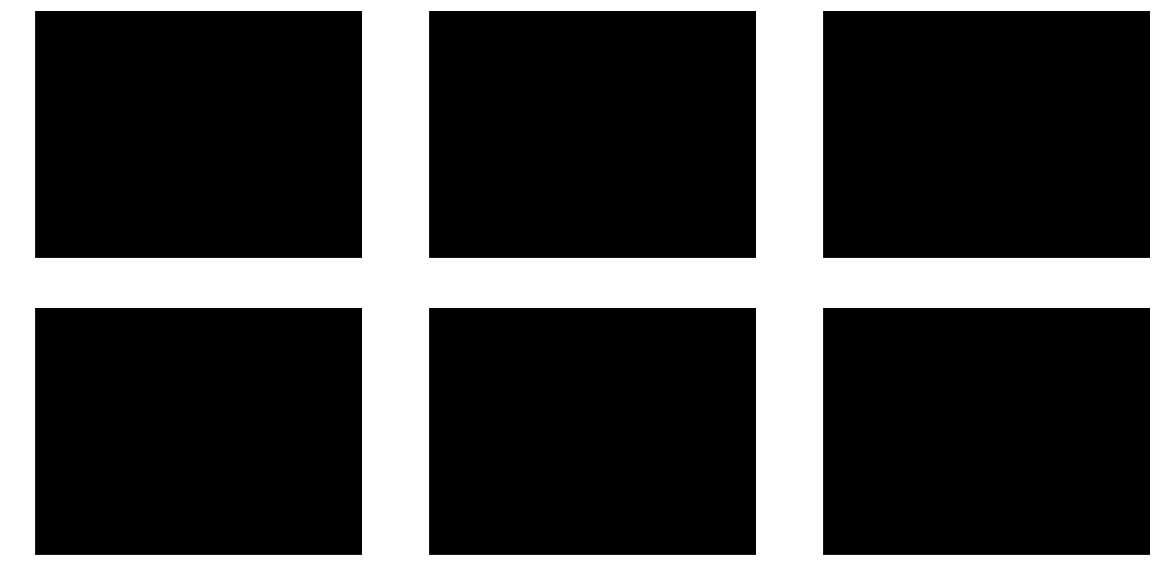

In [13]:
fig,axs = plt.subplots(2,3, figsize = (20,10))
c = -1
d = 0
for j in range(num_blocks):
    c+=1
    axs[c,d].scatter()
    metric1 = x.optimal_trial_results['Player Leave Time Times']

Pickle Individual Subject Sims

In [ ]:
# if 'subject_sim_50' not in locals():
#     load_path = r'C:\Users\Seth Sullivan\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\Model Objects\\'
#     subnames = ['Sub1','Sub2','Sub3','Sub4','Sub5','Sub6','Sub7','Sub8','Sub9','Sub10','Sub11','Sub12']
#     subject_sim_50 = {}
#     subject_sim_150 = {}
#     for sub in subnames:
#         o1 = dill.load((open(load_path + f'{sub}_sim_sd50.pkl', 'rb')))
#         o2 = dill.load((open(load_path + f'{sub}_sim_sd150.pkl', 'rb')))
#         subject_sim_50.update({sub:o1})
#         subject_sim_150.update({sub:o2})


Pickle Group Sims

In [ ]:
# if 'group_sim_50' not in locals():
#     group_sim_50 = dill.load((open(load_path + 'group_sim_sd50.pkl', 'rb')))
#     group_sim_150 = dill.load((open(load_path+'group_sim_sd150.pkl','rb')))

Put sim50 and 150 at the experiment times together (this is in the Simulation_Experiment_Results class now)

In [ ]:


# subject_sim_results = {}
# for sub in subnames:
#     subject_sim_results_dict = {}
#     o1 = subject_simulation_dict_sd50[sub]
#     o2 = subject_simulation_dict_sd150[sub]
#     subject_sim_results = Simulation_Experiment_Results([group_sim_50,group_sim_150])

In [ ]:
group_sim_results['Mean Decision Time']

NameError: name 'group_sim_results' is not defined

Calculate Means across all subject simulations

In [ ]:
num_results = len(subject_sim_results['Sub1'].keys()) # Get number of results
all_subjects_sim_results = np.zeros((num_subjects,num_results,num_blocks)) # Create 3d array to store all subjects 
for i,sub in enumerate(subnames): # Iterate trhoguh each subject
    j=-1
    for k,v in subject_sim_results[sub].items(): # Iterate through the keys and values of the subject sim experiment results dict for each subject
        j+=1
        all_subjects_sim_results[i,j,:] = v # Put the 6 conditions for each subject for each metric
# Take the mean across subjects
mean_sim_results_across_subjects = np.mean(all_subjects_sim_results,axis=0)

# Create new dictionary putting the results keys back in, with the new averaged simulation results
mean_sim_results_across_subjects_dict = {}
for metric,key in zip(mean_sim_results_across_subjects,subject_sim_results['Sub1'].keys()):
    mean_sim_results_across_subjects_dict.update({key:metric})

NameError: name 'subject_sim_results' is not defined

Plot subject sims

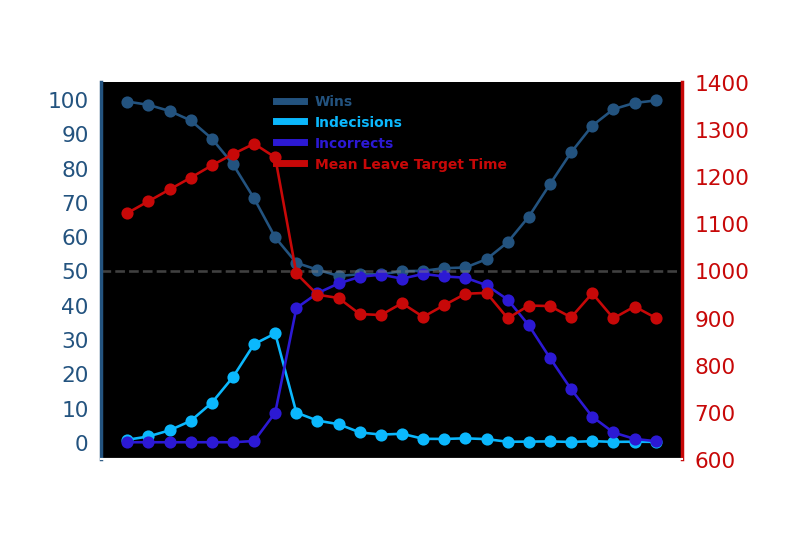

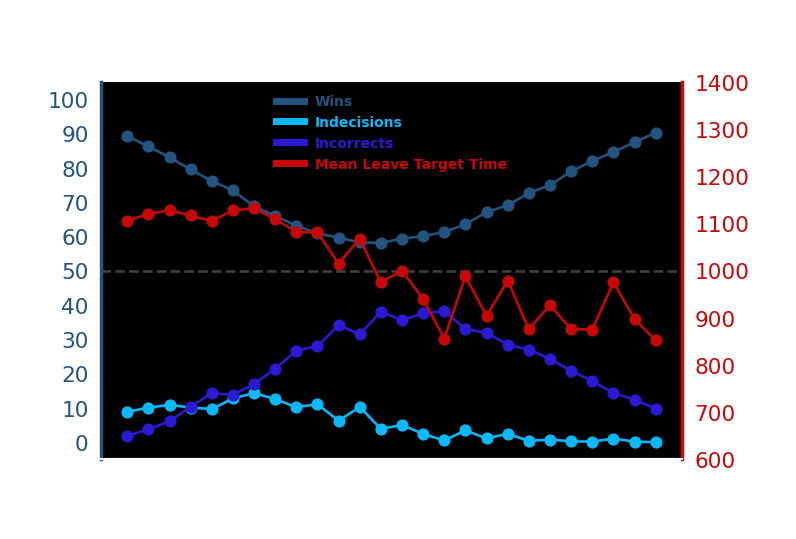

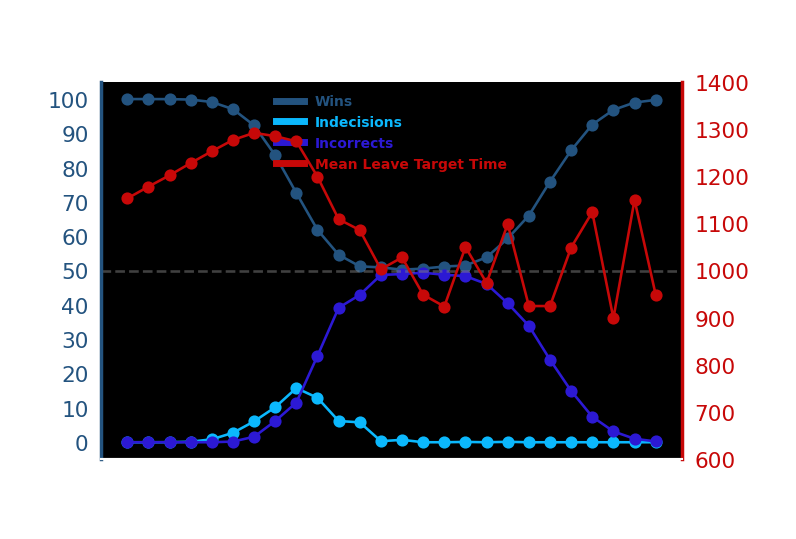

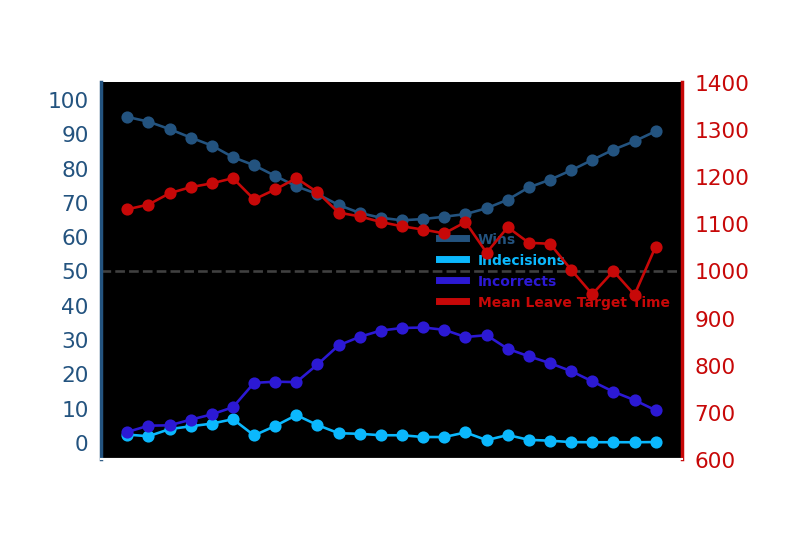

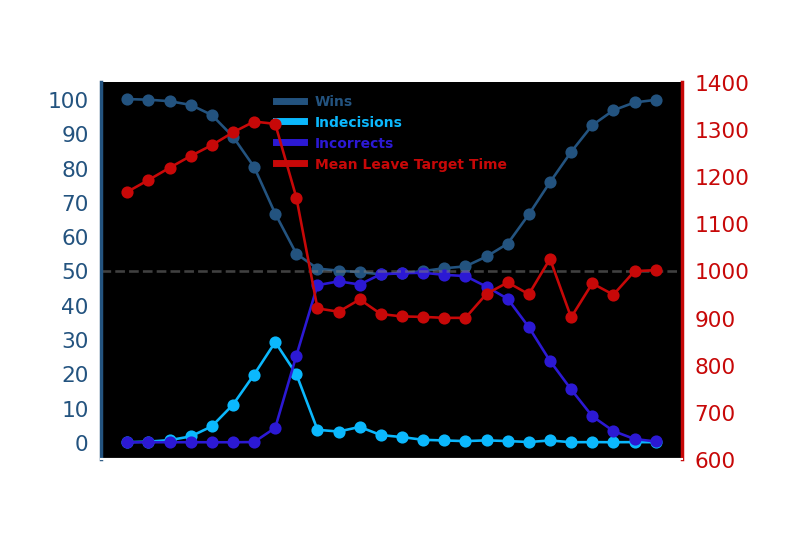

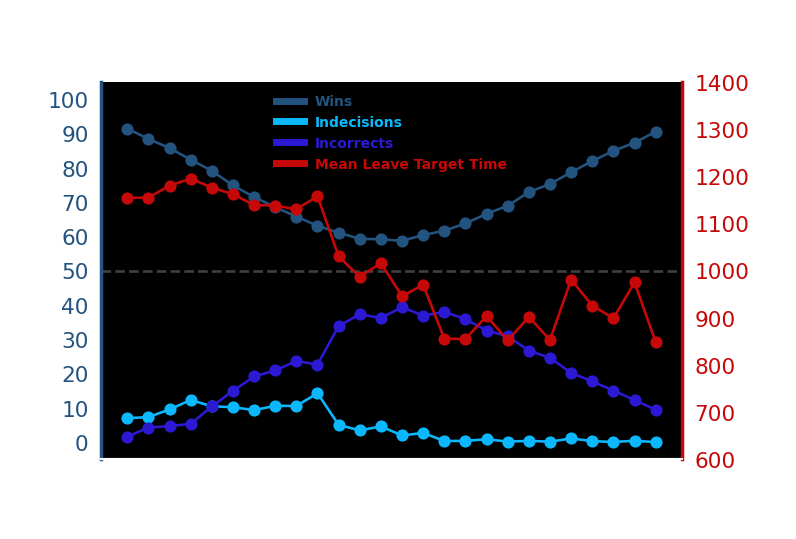

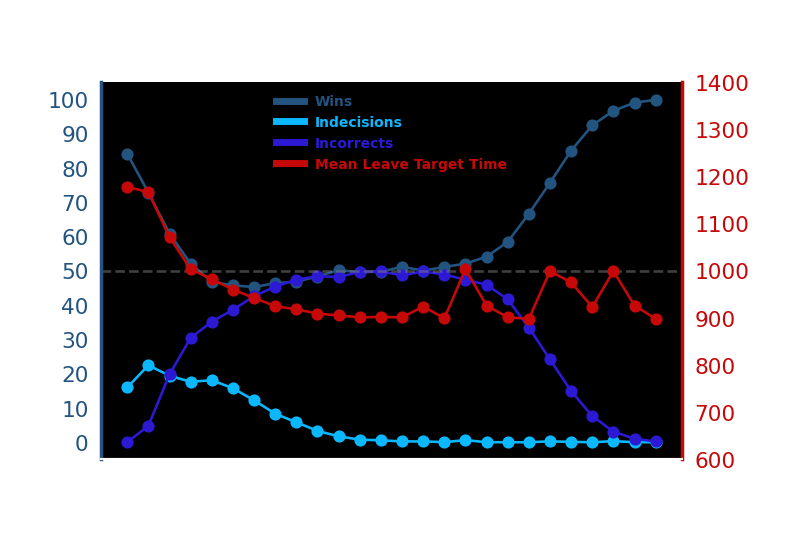

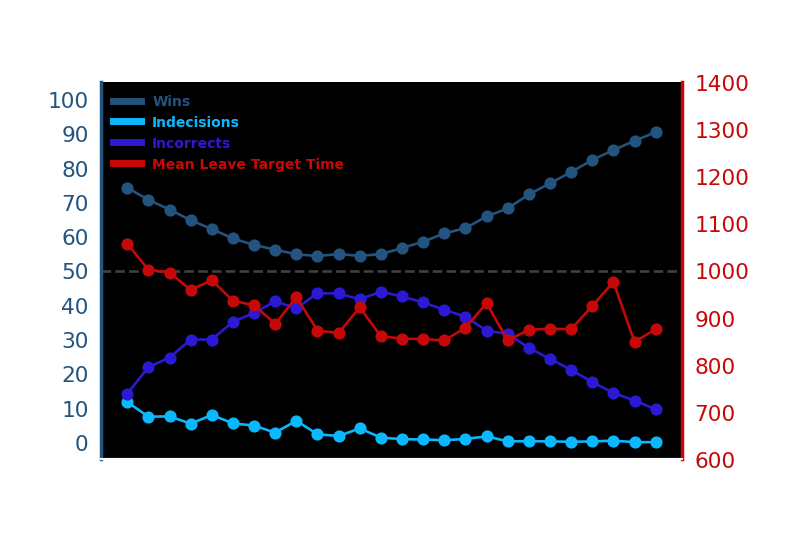

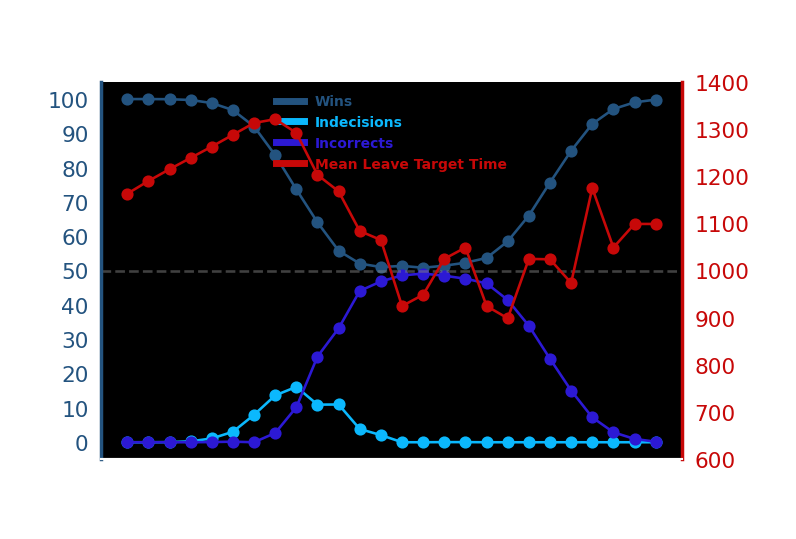

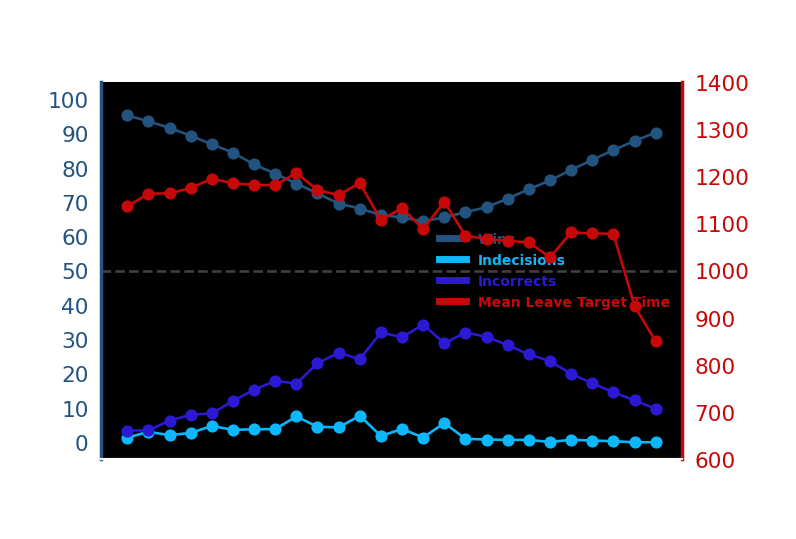

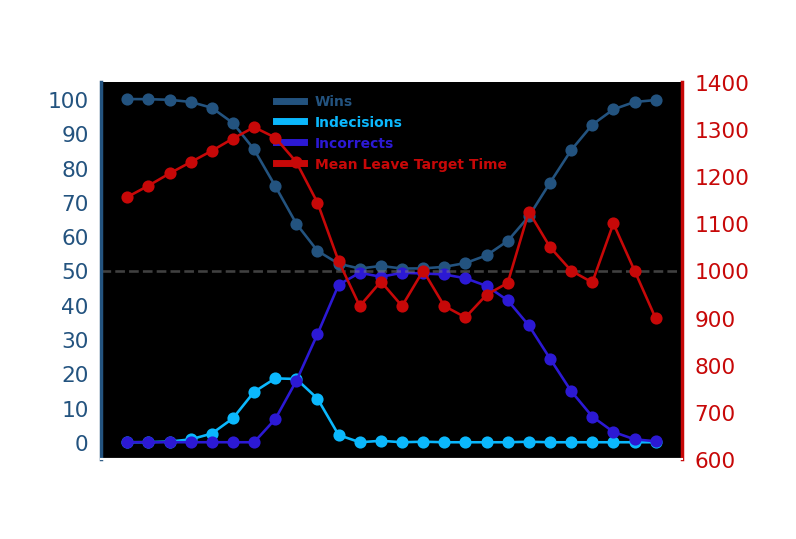

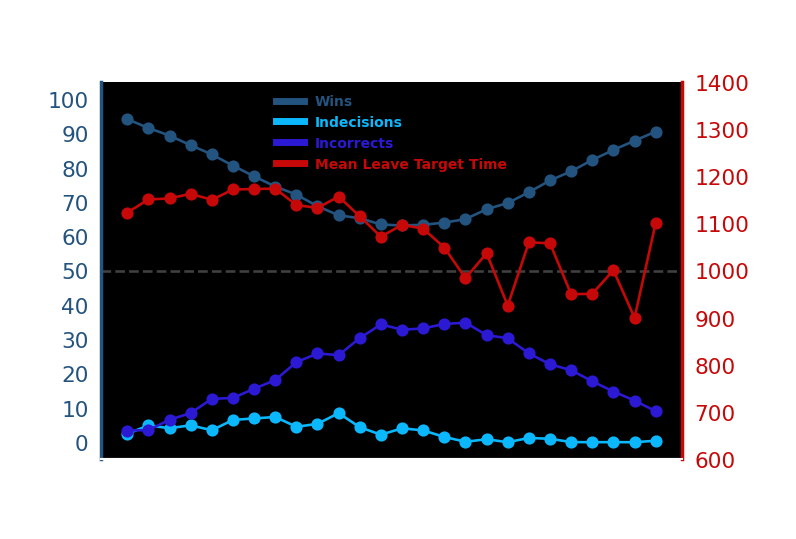

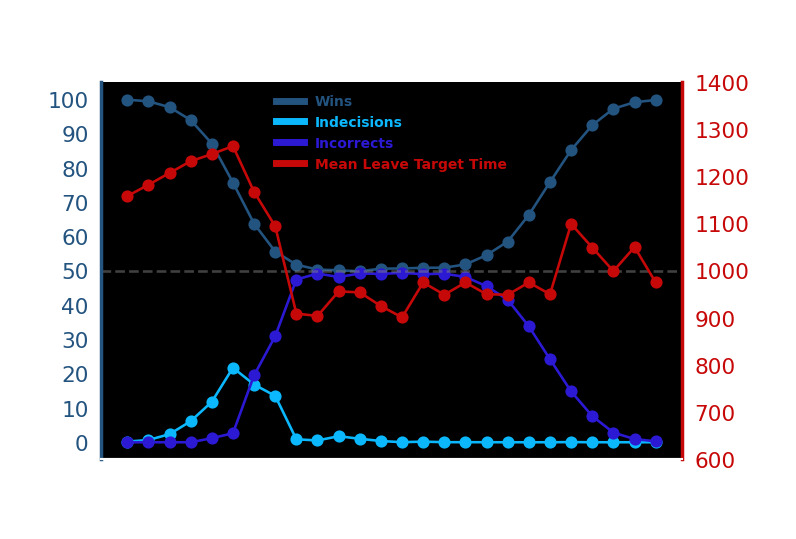

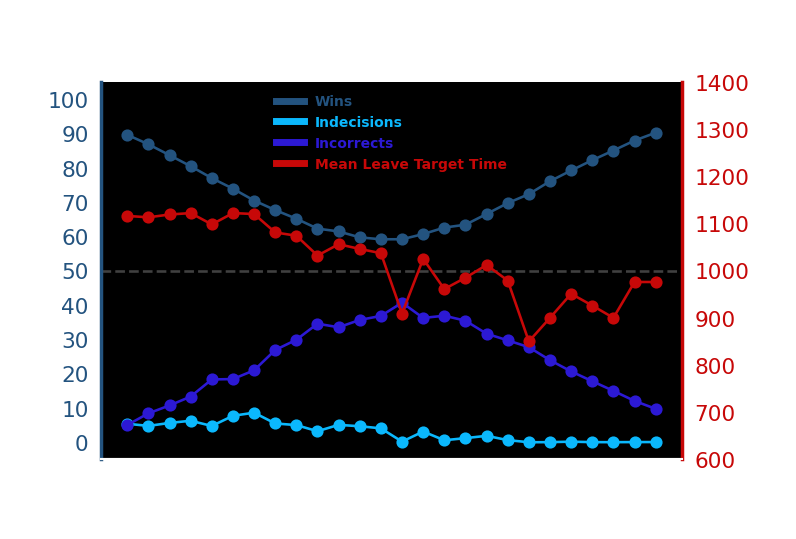

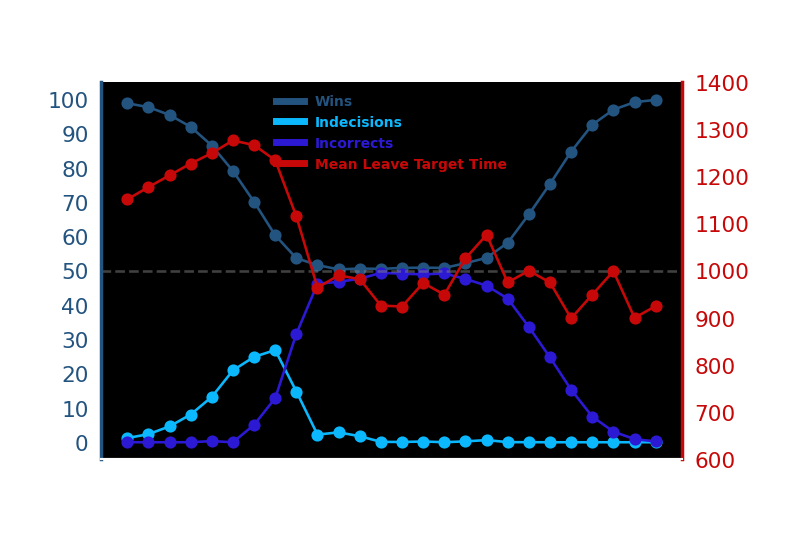

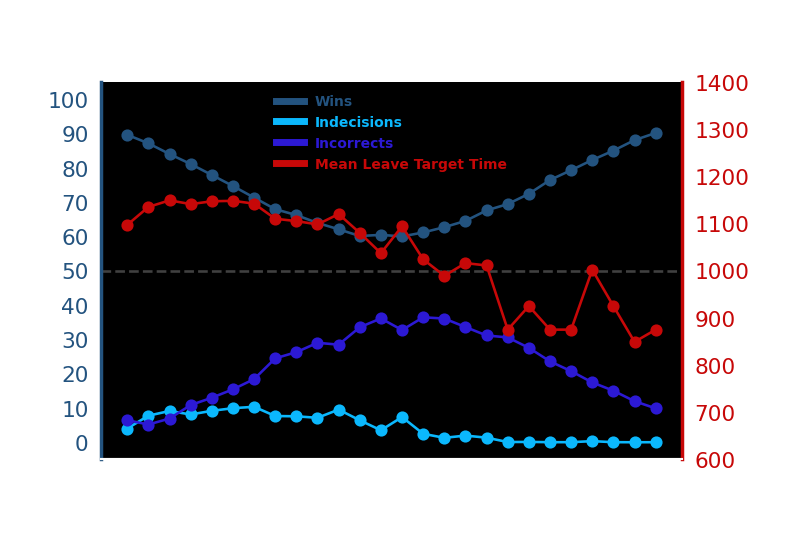

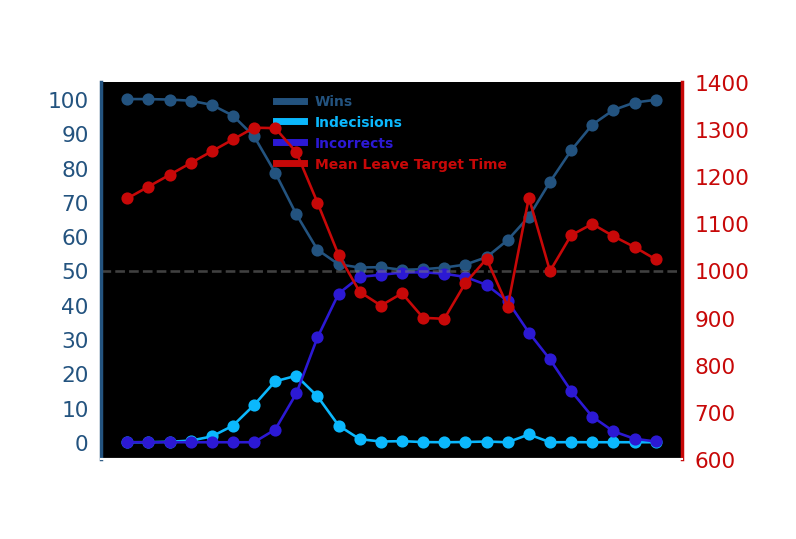

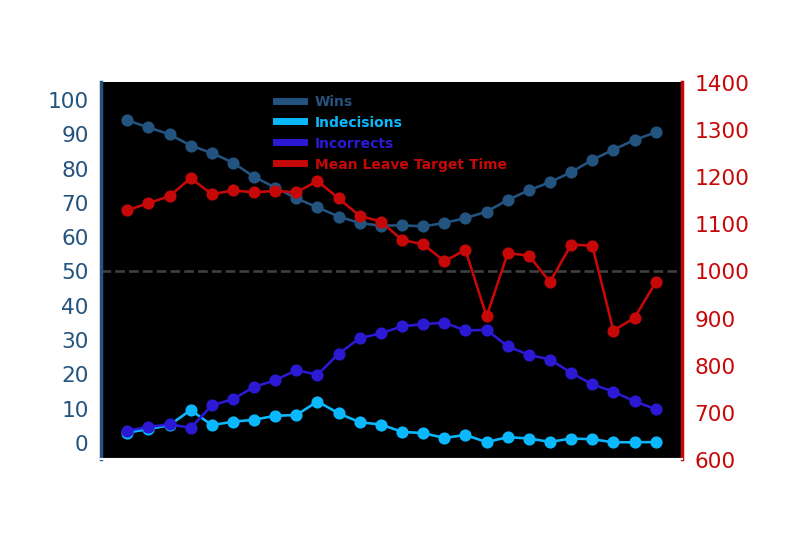

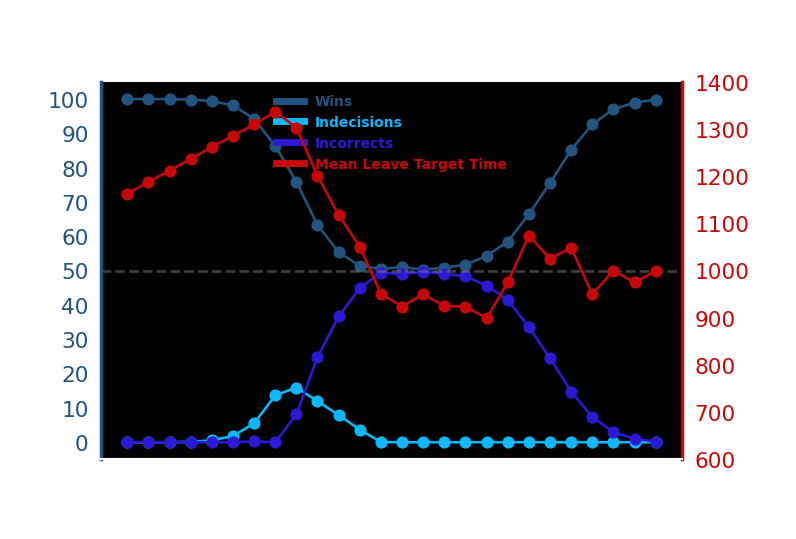

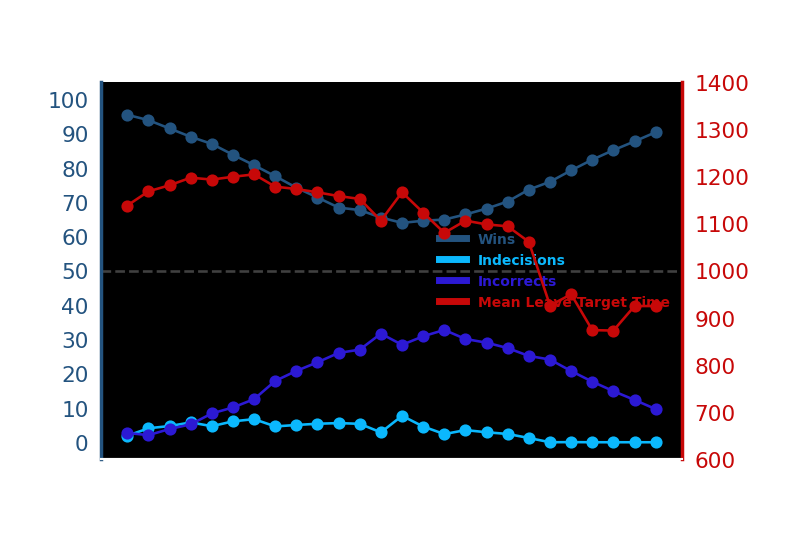

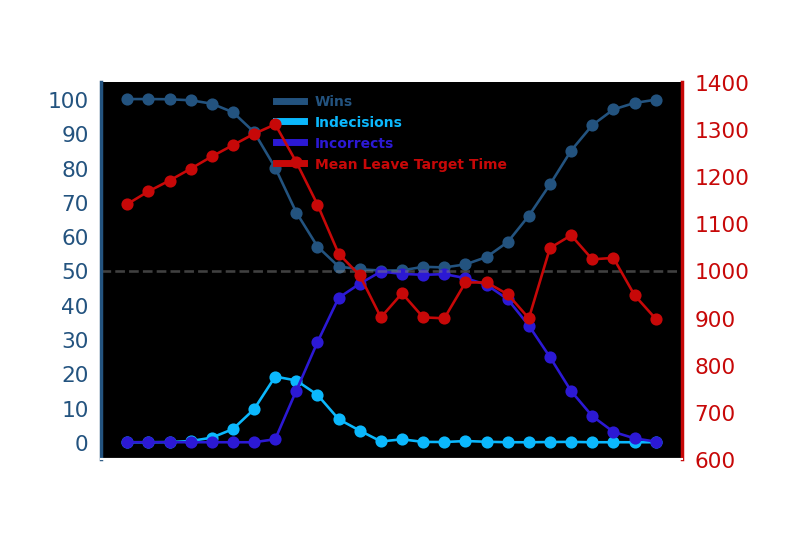

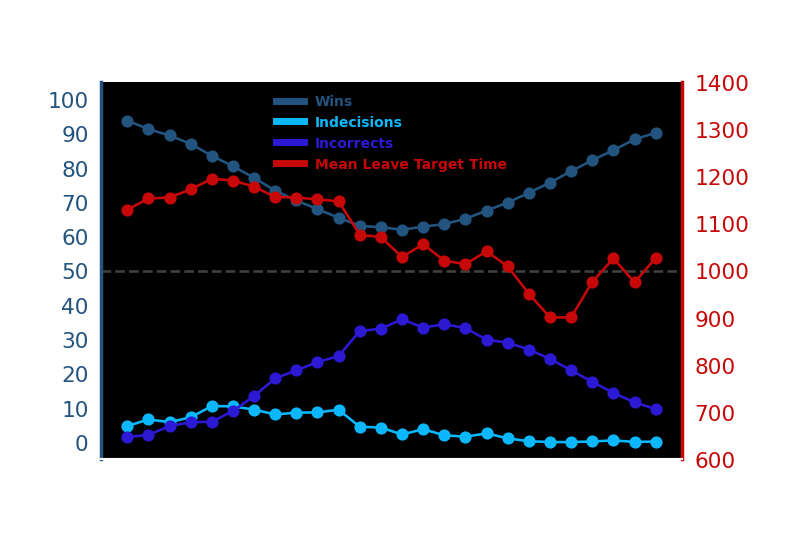

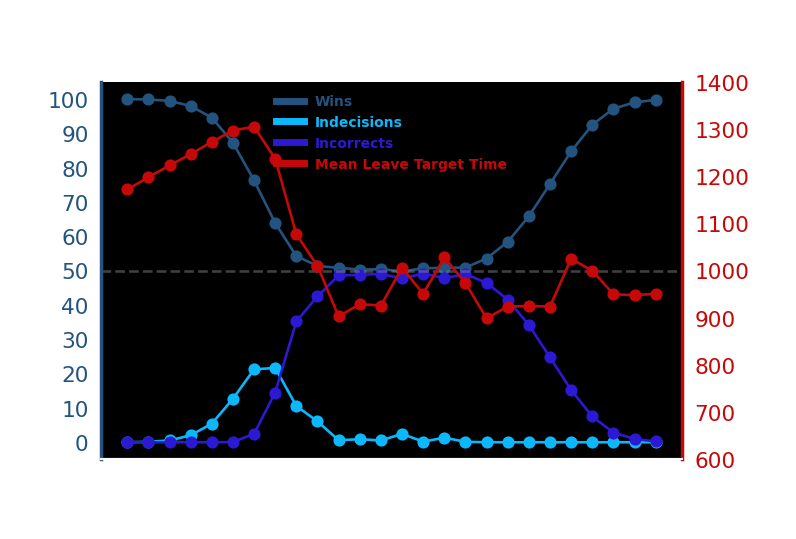

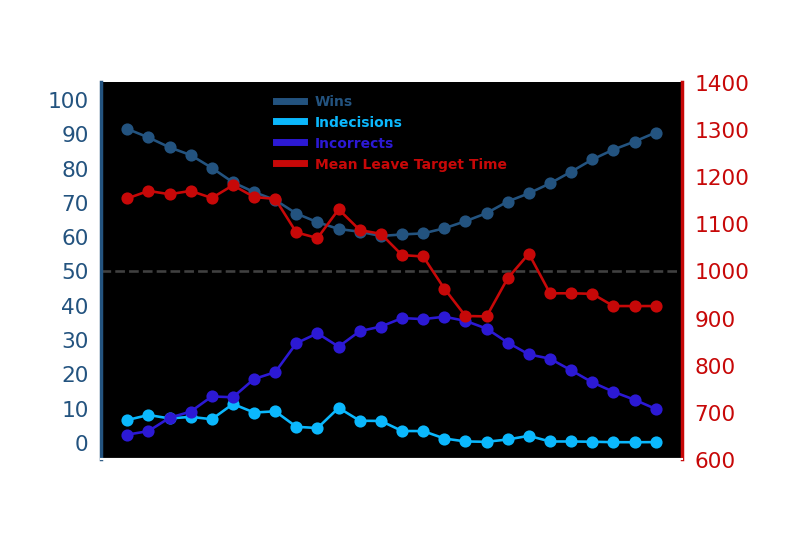

In [ ]:
for sub in subnames:
    subject_simulation_dict_sd50[sub].plot_optimals_all_on_one(['Wins','Indecisions','Incorrects'],['Mean Leave Target Time'])
    subject_simulation_dict_sd150[sub].plot_optimals_all_on_one(['Wins','Indecisions','Incorrects'],['Mean Leave Target Time'])
    

Plot Group

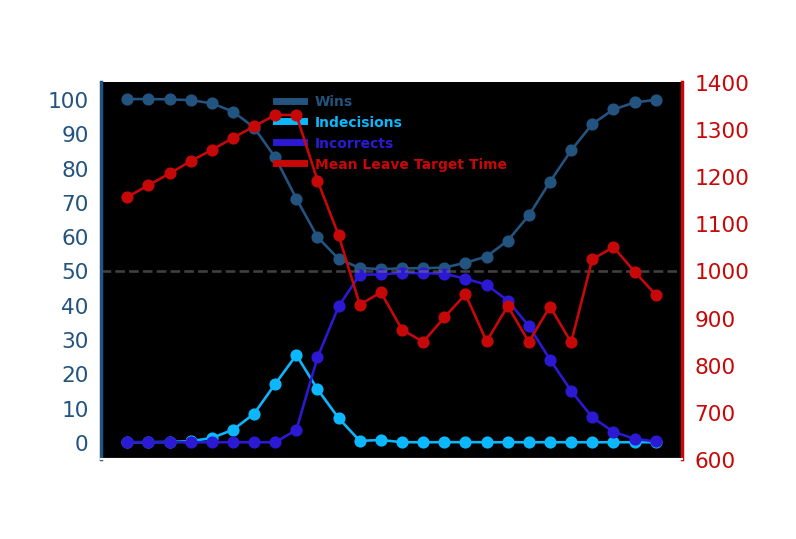

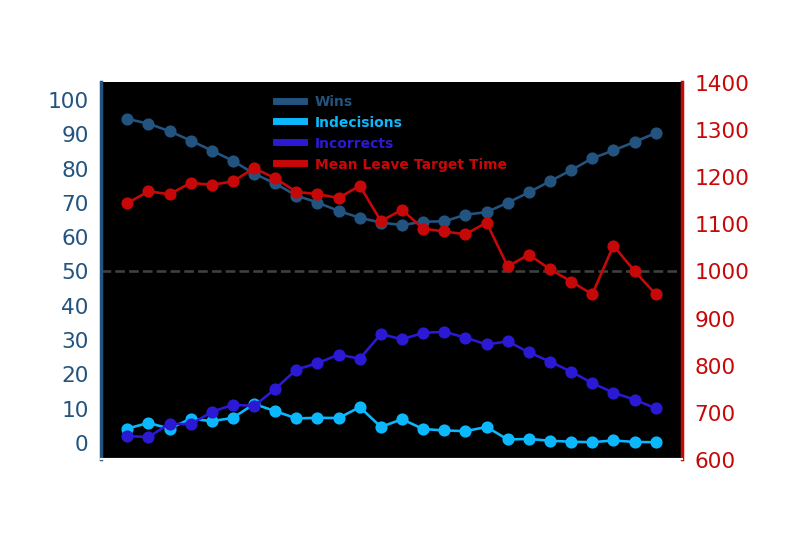

In [ ]:
group_sim_50.plot_optimals_all_on_one(['Wins','Indecisions','Incorrects'],['Mean Leave Target Time'])
group_sim_150.plot_optimals_all_on_one(['Wins','Indecisions','Incorrects'],['Mean Leave Target Time'])

## Set Save

In [14]:
save = False

## Plot Sims on Data

Plot decision time distributions of simulation then data

In [14]:
group_sim_results

KeyboardInterrupt: 

Mean Decision Time (group sim)

NameError: name 'group_sim_results' is not defined

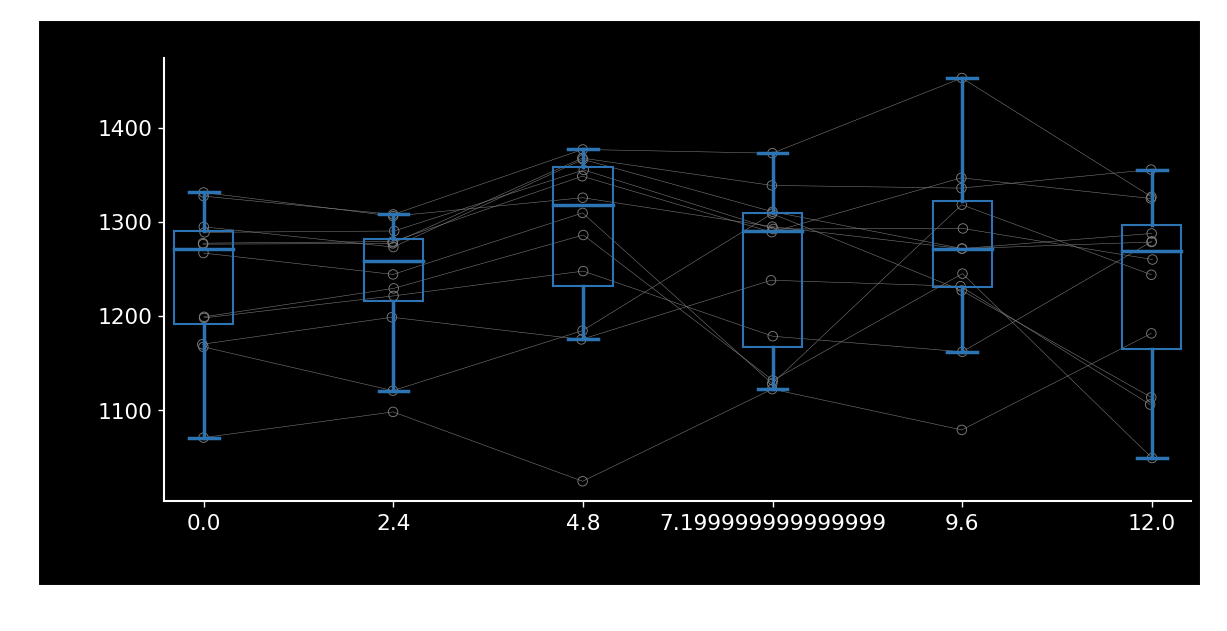

In [16]:
metric = group.combine_all_subjects('player_task_decision_time_mean') 

w,h = 12,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.3,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(900,1600,100)
bw = 0.75
multi_boxplot(ax,metric,xlocs=xlocs,box_width = bw,colors = wheel.seth_blue)
dv.jitter_array(ax=ax,x_positions=xlocs,data_list=metric.T, noise_scale=0.01, include_mean = False, circle_size=30)

ax.plot(xlocs,group_sim_results['Mean Leave Target Time'],c='grey',marker='o')


ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(trial_block_titles)
ax.set_xlim(min(xlocs)-1.8*bw,max(xlocs)+1.8*bw), ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_ylabel('Time (ms)')
ax.set_title('Mean Decision Time')
if save:
    axmain.set_axis_off()
    plt.savefig(SAVE_PATH+'mean_decision_time', dpi = 400, transparent = True)
else:
    axmain.set_axis_on()
plt.show()

Mean Decision Time (averaged sims)

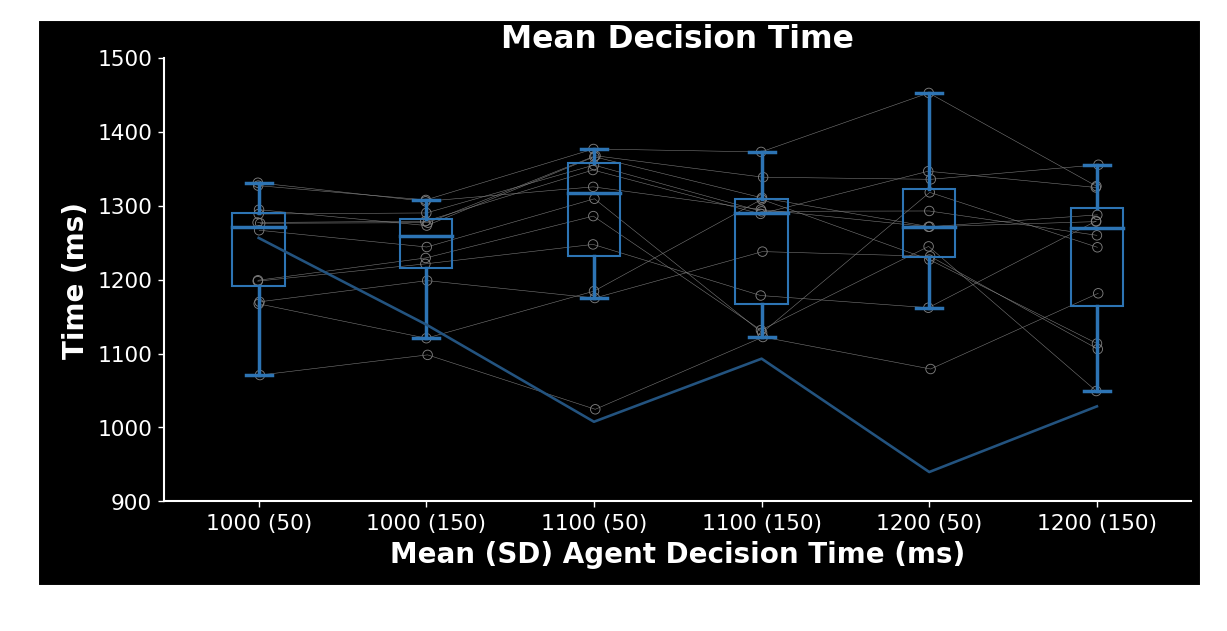

In [ ]:
metric = group.combine_all_subjects('player_task_decision_time_mean') 

w,h = 12,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.3,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(900,1600,100)
bw = 0.75
multi_boxplot(ax,metric,xlocs=xlocs,box_width = bw,colors = wheel.seth_blue)
dv.jitter_array(ax=ax,x_positions=xlocs,data_list=metric.T, noise_scale=0.01, include_mean = False, circle_size=30)

ax.plot(xlocs,mean_sim_results_across_subjects_dict['Mean Leave Target Time'])


ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(trial_block_titles)
ax.set_xlim(min(xlocs)-1.8*bw,max(xlocs)+1.8*bw), ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_ylabel('Time (ms)')
ax.set_title('Mean Decision Time')
if save:
    axmain.set_axis_off()
    plt.savefig(SAVE_PATH+'mean_decision_time', dpi = 400, transparent = True)
else:
    axmain.set_axis_on()
plt.show()

Player-Agent Decision Time

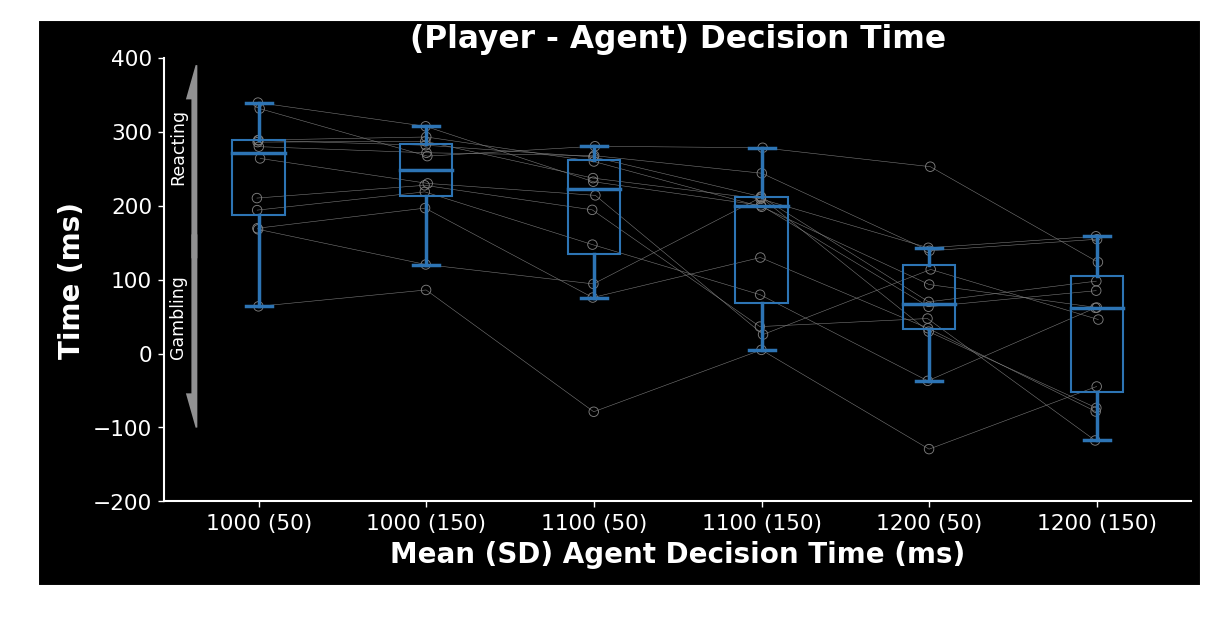

In [ ]:
metric = group.combine_all_subjects('player_minus_agent_task_decision_time_mean') 

w,h = 12,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.3,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(-200,500,100)
bw = 0.75
multi_boxplot(ax,metric,xlocs=xlocs,box_width = bw,colors = wheel.seth_blue)
dv.jitter_array(ax=ax,x_positions=xlocs,data_list=metric.T, noise_scale=0.01, include_mean = False, circle_size=30)

# ax.plot(xlocs, group_sim_results['Player Minus Agent Decision Time'])

ax.arrow(min(xlocs)-0.89,160,0,-(max(ylocs) - 140), width = 0.12, length_includes_head = True,head_length = 45,head_width=0.27,shape = 'left',color=wheel.grey)
ax.arrow(min(xlocs)-0.89,130,0,max(ylocs) - 140, width = 0.12, length_includes_head = True,head_length = 45,head_width=0.27,shape = 'right',color=wheel.grey,)# head_starts_at_zero=True)
ax.text(min(xlocs)-1.15,50,'Gambling',rotation=90, ha = 'center', va = 'center')
ax.text(min(xlocs)-1.15,280,'Reacting',rotation=90, ha = 'center', va = 'center')

ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(trial_block_titles)
ax.set_xlim(min(xlocs)-1.8*bw,max(xlocs)+1.8*bw), ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_ylabel('Time (ms)')
ax.set_title('(Player - Agent) Decision Time')
if save:
    axmain.set_axis_off()
    plt.savefig(SAVE_PATH+'player_minus_agent_decision_time', dpi = 400, transparent = True)
plt.show()

Indecisions (w/group sim)

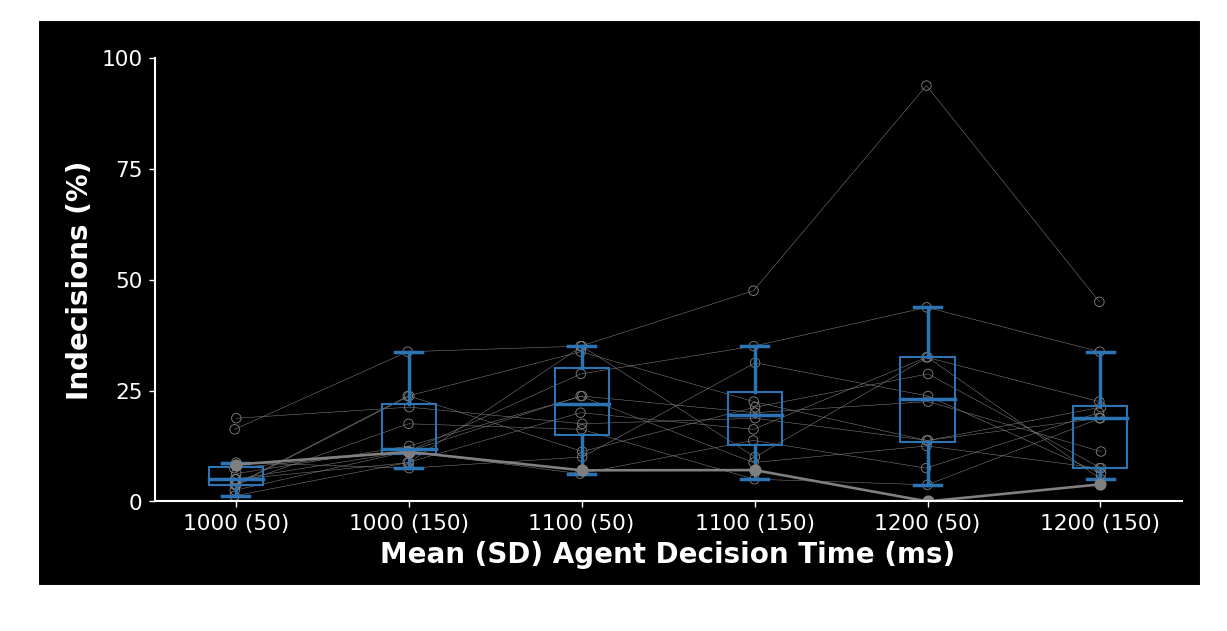

In [ ]:
metric = group.combine_all_subjects('player_perc_indecisions') 

w,h = 12,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.2,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(0,125,25)

bw = 0.75
multi_boxplot(ax,metric,xlocs=xlocs,box_width = bw,colors = wheel.seth_blue)
dv.jitter_array(ax=ax,x_positions=xlocs,data_list=metric.T, noise_scale=0.01, include_mean = False, circle_size=30)

ax.plot(xlocs,group_sim_results['Indecisions'],c='grey',marker='o')

ax.set_xlim(min(xlocs)-1.5*bw,max(xlocs)+1.5*bw), ax.set_ylim(min(ylocs),max(ylocs))
ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylim(0,100)
ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_ylabel('Indecisions (%)')
if save:
    axmain.set_axis_off()
    plt.savefig(SAVE_PATH+'indecisions', dpi = 400, transparent = True)
plt.show()

Indecisions (w/ averaged individual sims)

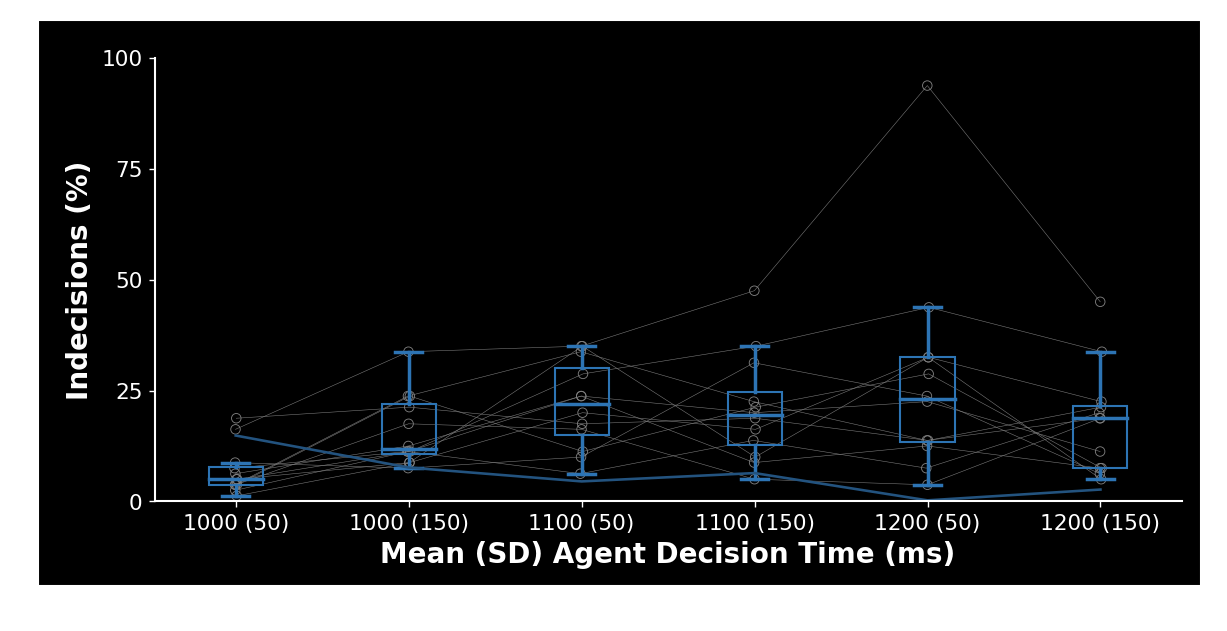

In [ ]:
metric = group.combine_all_subjects('player_perc_indecisions') 

w,h = 12,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.2,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(0,125,25)

bw = 0.75
multi_boxplot(ax,metric,xlocs=xlocs,box_width = bw,colors = wheel.seth_blue)
dv.jitter_array(ax=ax,x_positions=xlocs,data_list=metric.T, noise_scale=0.01, include_mean = False, circle_size=30)

ax.plot(xlocs,mean_sim_results_across_subjects_dict['Indecisions'])

ax.set_xlim(min(xlocs)-1.5*bw,max(xlocs)+1.5*bw), ax.set_ylim(min(ylocs),max(ylocs))
ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylim(0,100)
ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_ylabel('Indecisions (%)')
if save:
    axmain.set_axis_off()
    plt.savefig(SAVE_PATH+'indecisions', dpi = 400, transparent = True)
plt.show()


Indecisions (plot each simulation as a person)

Wins

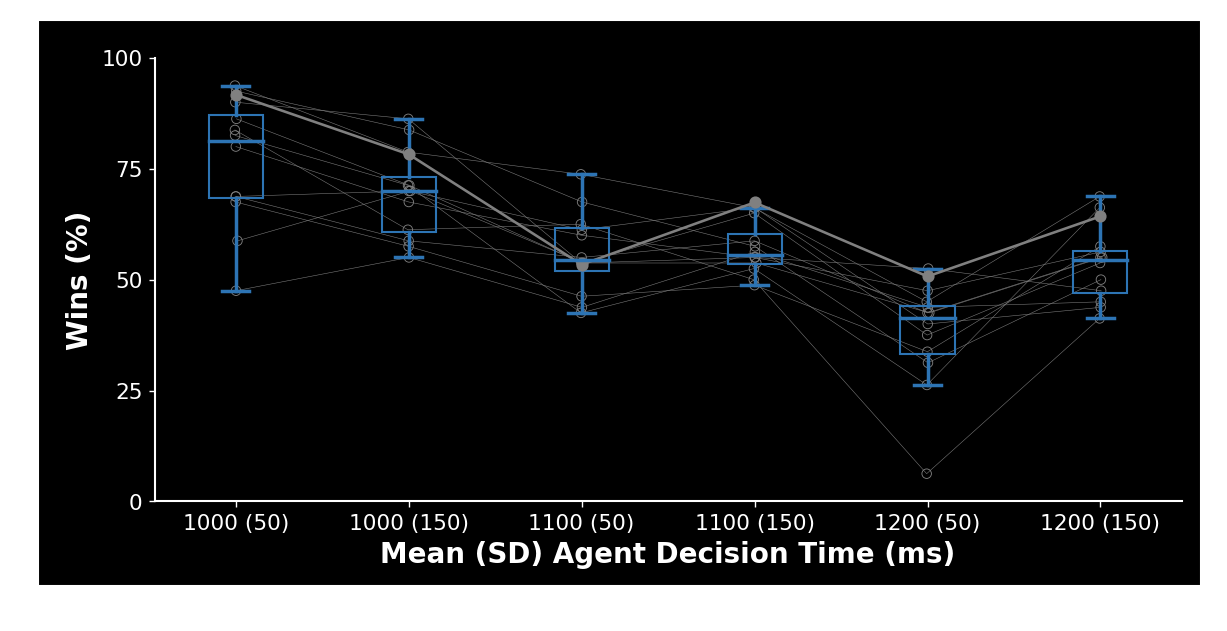

In [ ]:
metric = group.combine_all_subjects('player_perc_wins') 

w,h = 12,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.2,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(0,125,25)

bw = 0.75
multi_boxplot(ax,metric,xlocs=xlocs,box_width = bw,colors = wheel.seth_blue)
dv.jitter_array(ax=ax,x_positions=xlocs,data_list=metric.T, noise_scale=0.01, include_mean = False, circle_size=30)

ax.plot(xlocs,group_sim_results['Wins'],c='grey',marker='o')

ax.set_xlim(min(xlocs)-1.5*bw,max(xlocs)+1.5*bw), ax.set_ylim(min(ylocs),max(ylocs))
ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylim(0,100)
ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_ylabel('Wins (%)')
if save:
    axmain.set_axis_off()
    plt.savefig(SAVE_PATH+'wins', dpi = 400, transparent = True)
plt.show()